<a href="https://colab.research.google.com/github/Arya024/Customer-Churn-Prediction/blob/main/modelforChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
# Load the dataset
df = pd.read_csv("customer_dataset.csv")

In [16]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [17]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [18]:
# Check for missing values
print(df.isnull().sum())

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [27]:
df.isnull().any().any()


False

In [19]:
# Encode the gender variable
encoder = OneHotEncoder(drop='first')
df_encoded = encoder.fit_transform(df[['Gender','Location']])
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names_out())

In [20]:
# Concatenate the encoded gender variable with the rest of the dataset
df_encoded = pd.concat([df_encoded, df.drop(['Gender','Name','Location'], axis=1)], axis=1)

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Churn'], test_size=0.3)


In [22]:
# Train the model
model = LogisticRegression()


In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = round(precision_score(y_test, y_pred), 4)
recall = round(recall_score(y_test, y_pred),4)
f1 = round(f1_score(y_test, y_pred),4)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.503
Precision: 0.0
Recall: 0.0
F1: 0.0


In [29]:
# Perform cross-validation to evaluate the model's performance on unseen data
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train, cv=5)
print('Cross-validation scores:', scores)

Cross-validation scores: {'fit_time': array([0.08539438, 0.06836963, 0.07547188, 0.13187933, 0.11190128]), 'score_time': array([0.00708842, 0.00624466, 0.00934768, 0.02036548, 0.01047182]), 'test_score': array([0.50192857, 0.50185714, 0.50185714, 0.50185714, 0.50185714])}


In [31]:
# Tune the hyperparameters of the model to improve its performance
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train, y_train)
print('Best parameters:', clf.best_params_)

Best parameters: {'C': 0.01}


In [33]:
import joblib
# Package the model
joblib.dump(model, 'model.pkl')

['model.pkl']

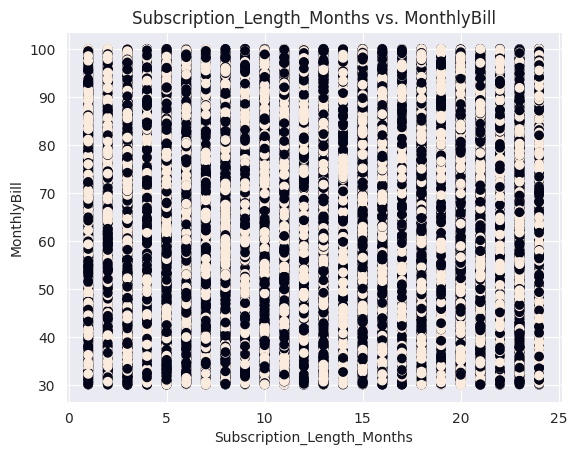

In [35]:
import matplotlib.pyplot as plt
# Create a scatter plot of tenure vs. monthly charges
plt.scatter(df['Subscription_Length_Months'], df['Monthly_Bill'], c=df['Churn'])
plt.xlabel('Subscription_Length_Months')
plt.ylabel('MonthlyBill')
plt.title('Subscription_Length_Months vs. MonthlyBill')
plt.show()

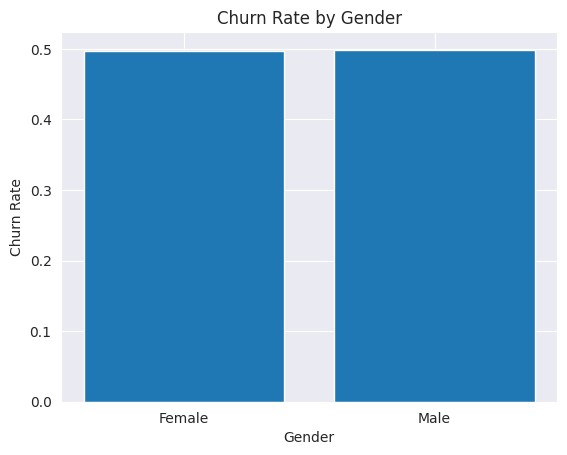

In [36]:
# Create a bar chart of churn rate by gender
churn_rate_by_gender = df.groupby('Gender')['Churn'].mean()
plt.bar(churn_rate_by_gender.index, churn_rate_by_gender.values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

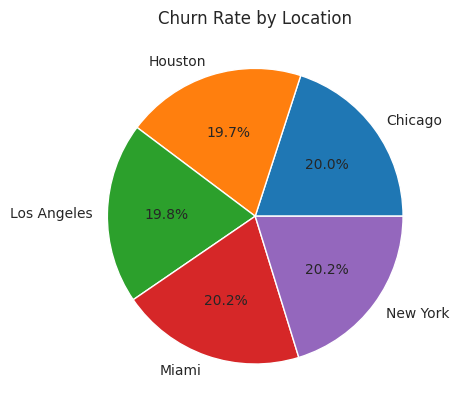

In [37]:
# Create a pie chart of churn rate by location
churn_rate_by_location = df.groupby('Location')['Churn'].mean()
plt.pie(churn_rate_by_location.values, labels=churn_rate_by_location.index, autopct="%1.1f%%")
plt.title('Churn Rate by Location')
plt.show()